## First notebook for inspecting PointID EDS data

In [1]:
# imports
import hyperspy.api as hs
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
# defining the path to the data, using
exports = Path("C:/Users/Brynjar/Documents/Masteroppgave/2022-09-06_EDS-Apreo/exports")
emsa_paths = list(exports.glob("*.emsa"))
print(f"Now {len(emsa_paths)} .emsa files are in the list 'emsa_paths'")

Now 20 .emsa files are in the list 'emsa_paths'


In [8]:
# the signal
s = hs.load(emsa_paths[-6]) # choosing NW_30kV.emsa
s.set_signal_type("EDS_SEM")
s.metadata # printing metadata

├── Acquisition_instrument
│   └── SEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 35.0
│       │       ├── energy_resolution_MnKa = 130.0
│       │       ├── live_time = 120.0
│       │       └── real_time = 137.830917358
│       ├── Stage
│       │   └── tilt_alpha = 0.0
│       └── beam_energy = 30.0
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 1.7.1
│   │       ├── io_plugin = hyperspy.io_plugins.msa
│   │       ├── operation = load
│   │       └── timestamp = 2022-09-12T12:59:19.040297+02:00
│   ├── date = 2022-09-06
│   ├── original_filename = NW_30kV.emsa
│   ├── time = 16:17:00
│   └── title = NW_30kV
└── Signal
    ├── quantity = X-rays (counts)
    └── signal_type = EDS_SEM

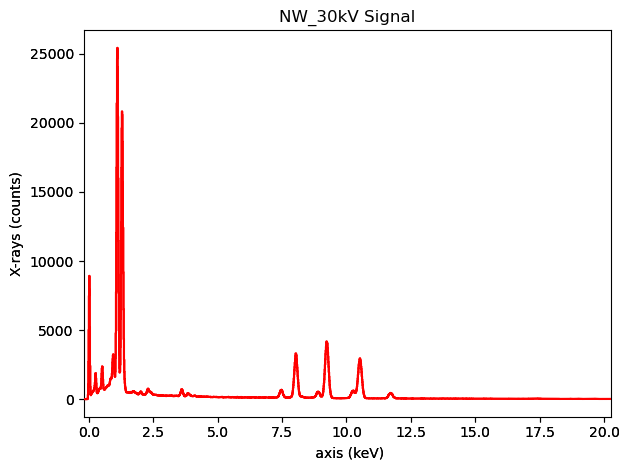

In [5]:
s.plot()
# how to crop only for plotting
# s.isig[1.:2.].plot()

In [9]:
# setting the elements which will have lines in the plot
s.set_elements(["C", "O", "Ga", "As"])

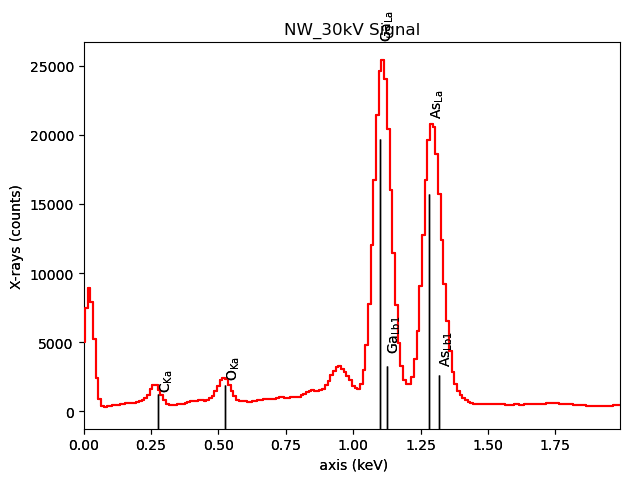

In [7]:
s.isig[0.0:2.0].plot(xray_lines=True)

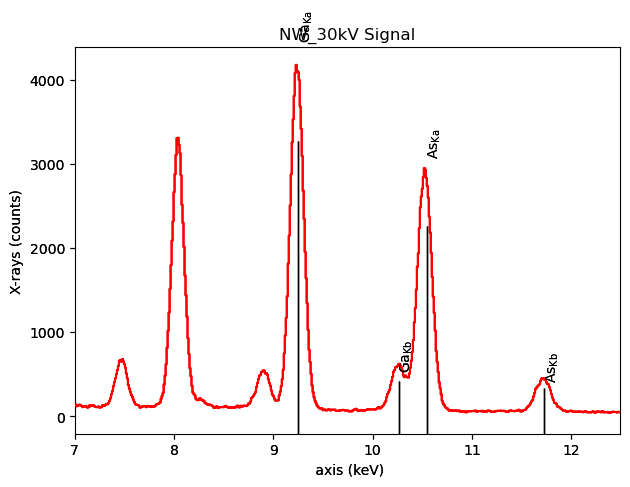

In [10]:
s.isig[7.0:12.5].plot(xray_lines=True)

In [11]:
s.data  # gives the 1D data

array([ 0.,  0.,  0., ...,  9., 14., 14.])

In [13]:
n = s.data / s.data.max()  # normalizing the intensisites to the highest peak set to 1
x = np.arange(0, 20.48, 0.010)  # making the 2048 long x-axis in uncalibrated keV

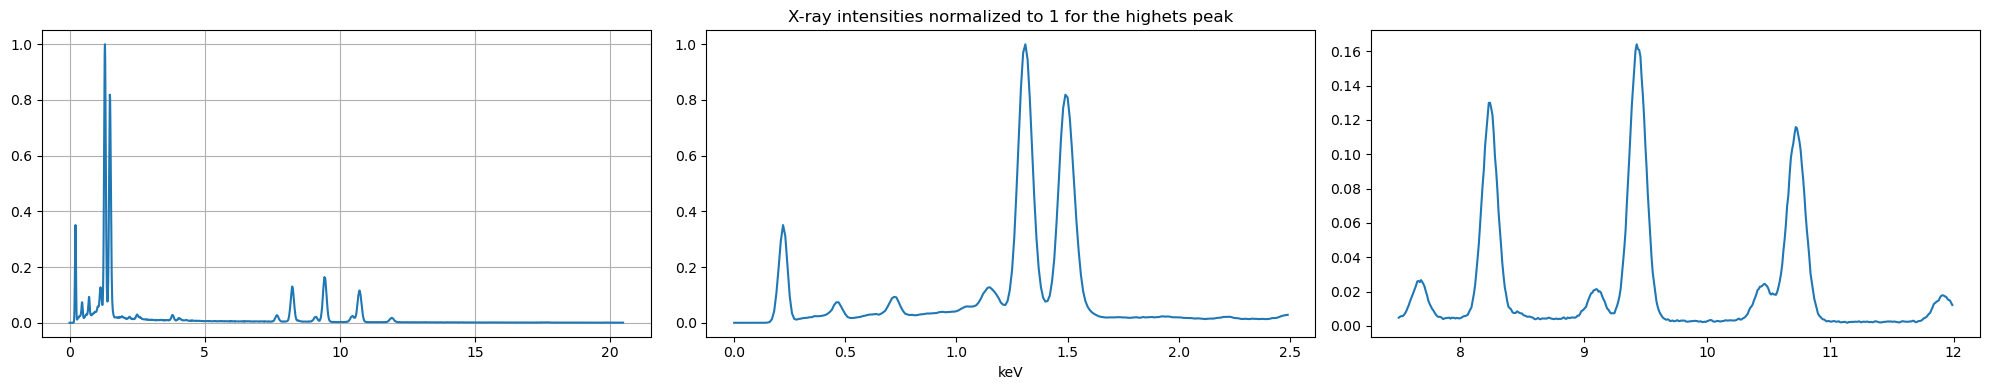

In [14]:
plt_lims = [0, 250, 750, 1200]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 4), tight_layout=True)
axs[0].plot(x, n)
axs[1].set_title("X-ray intensities normalized to 1 for the highets peak")
axs[1].set_xlabel("keV")
axs[1].plot(x[plt_lims[0] : plt_lims[1]], n[plt_lims[0] : plt_lims[1]])
axs[2].plot(x[plt_lims[2] : plt_lims[3]], n[plt_lims[2] : plt_lims[3]])
axs[0].grid(True)